In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import natsort
import glob2

In [3]:
files =  natsort.natsorted(glob2.glob('../data/reorder/*.csv'))

In [22]:
#Load the data generated via paraview for:


#updated ASPECT VEP ordering    

full_stress  = []
stored_stress  = []
for f in files:
    full_stress.append(np.mean(pd.read_csv(f)['full_stress']))
    stored_stress.append(np.mean(pd.read_csv(f)['tensor_mag']))
    
#original ASPECT VEP ordering    
files =  natsort.natsorted(glob2.glob('../data/original/*.csv'))
full_stress_  = []
stored_stress_  = []
for f in files:
    full_stress_.append(np.mean(pd.read_csv(f)['full_stress']))
    stored_stress_.append(np.mean(pd.read_csv(f)['tensor_mag']))

In [23]:
dt_record = 0.1
times = np.linspace(0, 8.1, len(full_stress))
times_ = np.linspace(0, 8.1, len(full_stress_))


In [24]:
maxT = 1
mu = 1e2
eta = 1e2
shearVelocity = 0.05

V  = shearVelocity
h  = 1.
C1 = -V*V*eta*eta*mu/(mu*mu*h*h + V*V*eta*eta);
C2 = -V*h*eta*mu *mu/(mu*mu*h*h + V*V*eta*eta);



analyticSoln = np.zeros(len(times))


for i in range(1,int(len(times))):
    if times[i] <= maxT:
        analyticSoln[i] = np.exp(-mu/eta*times[i])*(C2*np.cos(V*times[i]/h)-C1*np.sin(V*times[i]/h))-C2
    if times[i] > maxT:
        analyticSoln[i] =(np.exp(-mu/eta*maxT)*(C2*np.cos(V*maxT/h)-C1*np.sin(V*maxT/h))-C2)*np.exp(-mu/eta*(times[i]-maxT))

In [25]:
uw_data = np.loadtxt('../uw_model/data/regular_order.csv')

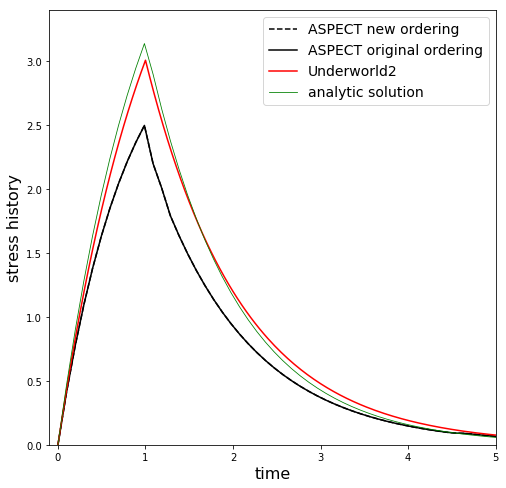

In [26]:
fig, ax = plt.subplots(figsize=(8,8))

#ax.plot(times, full_stress, c= 'r', ls = '--')
ax.plot(times, stored_stress, c = 'k', ls = '--', label='ASPECT new ordering')

#ax.plot(times_, full_stress_, c= 'r')
ax.plot(times_, stored_stress_, c= 'k', label='ASPECT original ordering')

ax.plot(uw_data[:,0], uw_data[:,1], c= 'r', label='Underworld2')


ax.plot(times, analyticSoln, lw = 0.8, c = 'green',  label='analytic solution')

ax.set_ylabel('stress history', fontsize = 16)
ax.set_xlabel('time', fontsize = 16)

#ax.hlines(3.5, -0.1, 5, label = 'cohesion', linewidths = 1, linestyles = '--')

ax.set_xlim(-0.1, 5)
ax.set_ylim(0, 3.4)

ax.legend(fontsize = 14)

In [17]:
#fig.savefig('simple_shear_comparison.png', dpi = 200)

## Considerations

In [27]:
sr_norm = 0.5*shearVelocity
cohesion = 3.5


vp_stress = 2.*sr_norm*eta
eta_ = cohesion/(2.*sr_norm) 

alpha   = eta / mu                         # viscoelastic relaxation time
dt_e    = 0.1                              # elastic time step

# viscoelastic effective viscosity
eta_eff = ( eta * dt_e ) / (alpha + dt_e)  # effective viscosity

alpha_   = eta_ / mu   
eta_eff_ = ( eta_ * dt_e ) / (alpha_ + dt_e)  # effective viscosity



print(eta, eta_eff)
print(eta_, eta_eff_)

100.0 9.09090909090909
70.0 8.75


In [84]:
#test_tensor = np.zeros((2,2))
#test_tensor[0, 1] = 0.05
#test_tensor = 0.5*(test_tensor + test_tensor.T)
#np.sqrt(0.5*np.tensordot(test_tensor, test_tensor))

In [28]:
#aspect strain rate Paraview output is missing the sqrt(0.5)

0.25/(np.sqrt(0.5))

0.35355339059327373